In [1]:
import pandas as pd
import numpy as np

### Making a linear dataset

In [6]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, random_state=4, noise=10, bias = 4)

In [9]:
X[:3]

array([[-1.3474603],
       [ 0.3523434],
       [ 0.9546986]])

In [11]:
y[:3]

array([-110.29640622,   42.84514523,   71.83340531])

### take a look at the data

<AxesSubplot:xlabel='X', ylabel='y'>

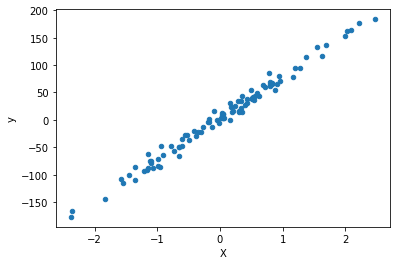

In [12]:
df = pd.DataFrame(X, columns=['X'])
df['y'] = y

df.plot(x='X', y='y', kind='scatter')

### making the funtion

In [13]:
class lin_reg():
    def __init__(self, alpha):
        self.alpha = alpha
        self.theta = np.zeros(1)

    def fit(self, X, y):
    
        # set starting values
        self.theta = np.zeros(X.shape[1]+1)

        if X.shape[0] != y.shape[0]:
            print('X and y are different sizes.')

        # length of all
        m = X.shape[0]

        # create a dummy set for the bias
        X_dummy = np.array([1]*m)

        # training
        for x_n, dummy, y_n in zip(X, X_dummy, y):
            y_hat = self.theta[0] + dummy
            for theta_i, x_i in zip(self.theta[1:], x_n):
                y_hat += theta_i*x_i

            self.theta[0] -= (self.alpha/m)*(y_hat - y_n)
            for i, x_i in enumerate(x_n):
                self.theta[i+1] -= (self.alpha/m)*(y_hat - y_n)*(x_i)
                
    def predict(self, X):
        result = np.array([1]*X.shape[0])*self.theta[0]
        
        for i, x in zip(self.theta[1:], X.T):
            result = result + (i*x)
            
        return result

### define and fit the model

In [14]:
model = lin_reg(alpha=10)

model.fit(X, y)

model.theta

array([ 3.98672438, 75.97867255])

In [15]:
X[0:3]

array([[-1.3474603],
       [ 0.3523434],
       [ 0.9546986]])

In [16]:
model.predict(X[0:3])

array([-98.39152016,  30.75730793,  76.52345649])

### See the results

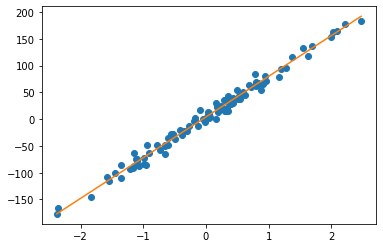

In [18]:
import matplotlib.pyplot as plt 

plt.plot(X, y, 'o', label='data')

xx = np.linspace(X.min(), X.max(), 100)

yy = model.theta[0] + model.theta[1]*xx

plt.plot(xx, yy, label='least squares fit, $y = a + bx$')

### compare to the sklearn regression

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.intercept_, reg.coef_

(3.783924120382255, array([75.44323245]))

In [20]:
reg.predict(X[0:3])

array([-97.87283614,  30.36584889,  75.80947231])

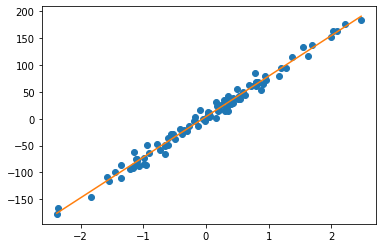

In [21]:
plt.plot(X, y, 'o', label='data')

xx = np.linspace(X.min(), X.max(), 100)

yy = reg.intercept_ + reg.coef_*xx

plt.plot(xx, yy, label='least squares fit, $y = a + bx$')